In [8]:
# using SVR to do the prediction

In [9]:
# to change the data into the right format
def transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    #print(len(series))
    for i in range(len(series)-window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    # reshape each 
    
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    return X,y

In [10]:
# normalise the data that will be used to train the model
from pandas import Series
import numpy as np
import pandas as pd
series = Series.from_csv('N_cur_2017_01_05.csv', header=0)
series = pd.to_numeric(series,errors='coerce')
series = series.dropna(axis=0)
window_size = 7
series = series.tolist()
#print (len(series))
# series = series[0:500]
mean_series = np.mean(series)
series = (series-mean_series)/mean_series

X,y = transform_series(series = series,window_size = window_size)

In [11]:
# to divide the dataset into training set and test set
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point, np.ceil: Return the ceiling of the input, element-wise.

# 2/3 of the whole dataset is training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# 1/3 of the whole dataset is test set
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

In [12]:
# to train the data modeling using SVR
from sklearn.svm import SVR
import numpy as np

np.random.seed(0)
y = y_train
X = X_train
clf = SVR(kernel='rbf', C=0.1, epsilon=0.01)
clf.fit(X, y) 

F:\anaconda\envs\individual-project\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

The score of the accurancy
0.770492295051


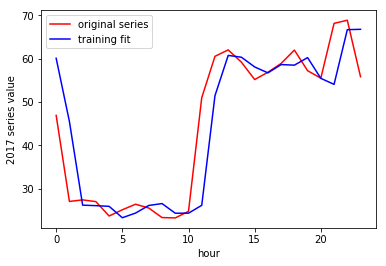

In [13]:
# 图像展示预测结果
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(series[-24:]*mean_series+mean_series,color = 'r', label='Original')
test_predict = clf.predict(X_test)
print("The score of the accurancy")
print (clf.score(X, y))
# print(len(test_predict))
# plot testing set prediction
plt.plot(np.arange(0,24,1),test_predict[-24:]*mean_series+mean_series,color = 'b', label='Predict')

# pretty up graph
plt.xlabel('hour')
plt.ylabel('2017 series value')
plt.legend(['original series','training fit','testing fit'],loc='best')
plt.show()